<a href="https://colab.research.google.com/github/jbblancojr/endangered_species/blob/main/BA810_CBSJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [100]:
species = pd.read_csv('/content/gdrive/MyDrive/BA810-GroupProj/learning_set_w_GHG.csv')

<ipython-input-100-944836a5256e>:1: DtypeWarning: Columns (23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  species = pd.read_csv('/content/gdrive/MyDrive/BA810-GroupProj/learning_set_w_GHG.csv')


In [101]:
species.head(3)

,Unnamed: 0.1,Unnamed: 0,group,binomial,iucn_id_no,common_name,name_language,iucn_category,iso_a3,total_area,...,"Climate related disasters frequency, Number of Disasters: Drought","Climate related disasters frequency, Number of Disasters: Extreme temperature","Climate related disasters frequency, Number of Disasters: Flood","Climate related disasters frequency, Number of Disasters: Landslide","Climate related disasters frequency, Number of Disasters: Storm","Climate related disasters frequency, Number of Disasters: TOTAL","Climate related disasters frequency, Number of Disasters: Wildfire",Population Density,Change in Precipitation,GHG emissions
0,0,0,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,IDN,128005.5600,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611
1,1,271,Amphibians,Alcalus baluensis,79935161.0,Balu Eastern Frog,eng,LC,IDN,240233.7000,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611
2,2,274,Amphibians,Alcalus rajae,42863256.0,King Dwarf Mountain Frog,eng,NT,IDN,2237.9141,...,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41,1240.832611


In [102]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517655 entries, 0 to 517654
Data columns (total 26 columns):
 #   Column                                                                         Non-Null Count   Dtype  
---  ------                                                                         --------------   -----  
 0   Unnamed: 0.1                                                                   517655 non-null  int64  
 1   Unnamed: 0                                                                     517655 non-null  int64  
 2   group                                                                          517655 non-null  object 
 3   binomial                                                                       517655 non-null  object 
 4   iucn_id_no                                                                     256612 non-null  float64
 5   common_name                                                                    216991 non-null  object 
 6   name_languag

In [103]:
# Drop blank rows
species.dropna(subset=['iucn_id_no'], inplace=True)
species.dropna(subset=['Population Density'], inplace=True)

In [104]:
# Fill blank rows in Climate disasters to 0
species['Surface Temperature Change'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Drought'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Landslide'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Flood'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Storm'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Wildfire'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Extreme temperature'].fillna(0, inplace=True)
species['Change in Precipitation'].fillna(0, inplace = True)

In [105]:
# Drop irrelevant columns
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'binomial', 'iucn_id_no', 'iso_a3', 'common_name','name_language', 'wb_iso', 'Climate related disasters frequency, Number of Disasters: TOTAL']
species = species.drop(columns=columns_to_drop)

In [106]:
# Drop rows with iucn_category = 'DD' (Data Deficient)
species = species[species['iucn_category'] != 'DD']

In [107]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220909 entries, 0 to 517654
Data columns (total 17 columns):
 #   Column                                                                         Non-Null Count   Dtype  
---  ------                                                                         --------------   -----  
 0   group                                                                          220909 non-null  object 
 1   iucn_category                                                                  220909 non-null  object 
 2   total_area                                                                     220909 non-null  float64
 3   small_range                                                                    220909 non-null  int64  
 4   wb_datanam                                                                     220909 non-null  object 
 5   Inhabited Area within Country                                                  220909 non-null  float64
 6   datanam_pct_

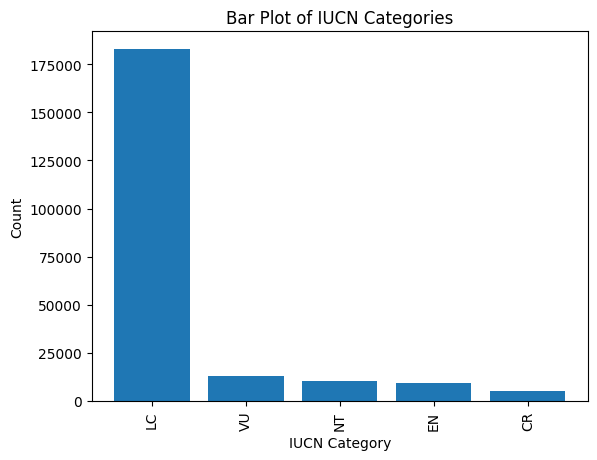

In [108]:
category_counts = species['iucn_category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('IUCN Category')
plt.ylabel('Count')
plt.title('Bar Plot of IUCN Categories')
plt.xticks(rotation=90)
plt.show()

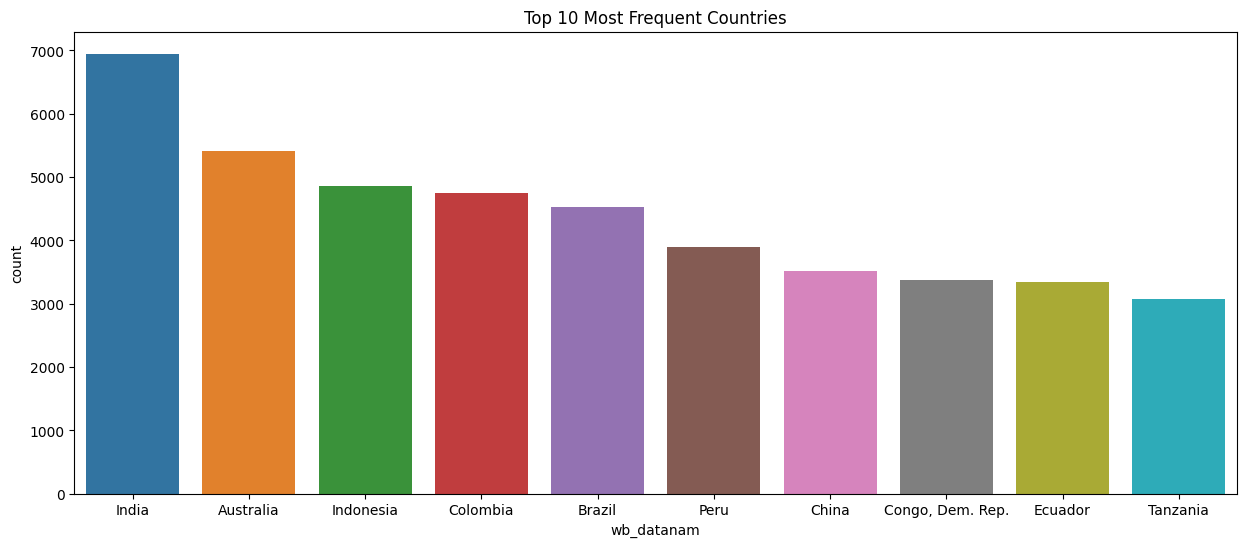

In [109]:
# Get the top 10 most frequent countries in the dataset
top10_countries = species['wb_datanam'].value_counts().head(10)

# Filter the dataset to include only the top 10 countries
top10_data = species[species['wb_datanam'].isin(top10_countries.index)]

# Create a countplot for the top 10 most frequent countries
plt.figure(figsize=(15, 6))
sns.countplot(x='wb_datanam', data=top10_data, order=top10_countries.index)
plt.title('Top 10 Most Frequent Countries')
plt.show()

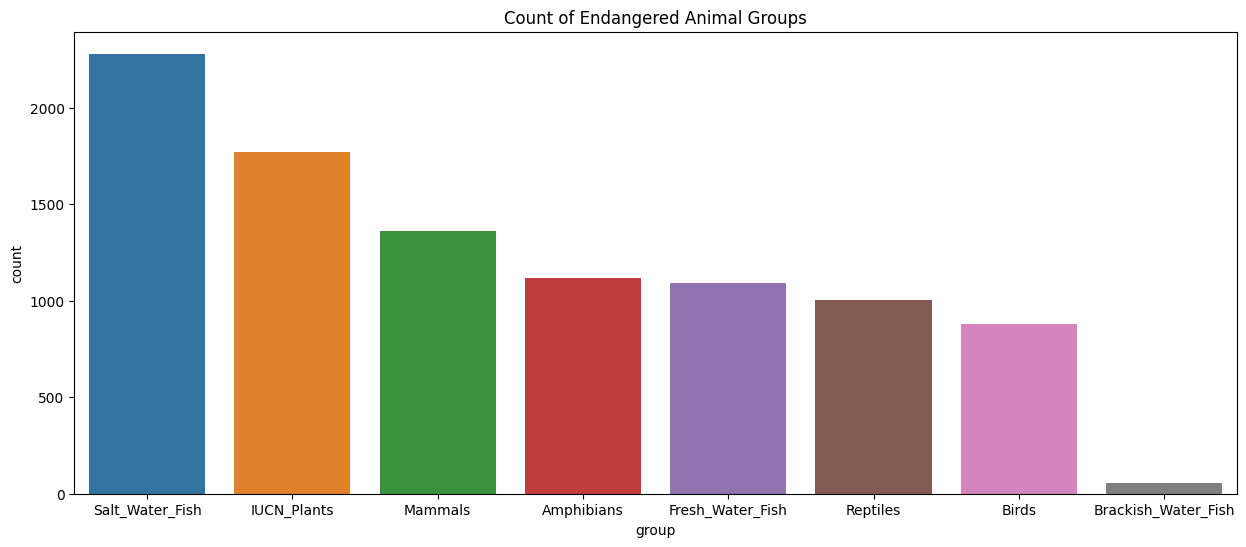

In [110]:
# Filter the dataset for Endangered animals
en_data = species[species['iucn_category'] == 'EN']

# Create a countplot for the Endagered animal groups
plt.figure(figsize=(15, 6))
sns.countplot(x='group', data=en_data, order=en_data['group'].value_counts().index)
plt.title('Count of Endangered Animal Groups')
plt.show()

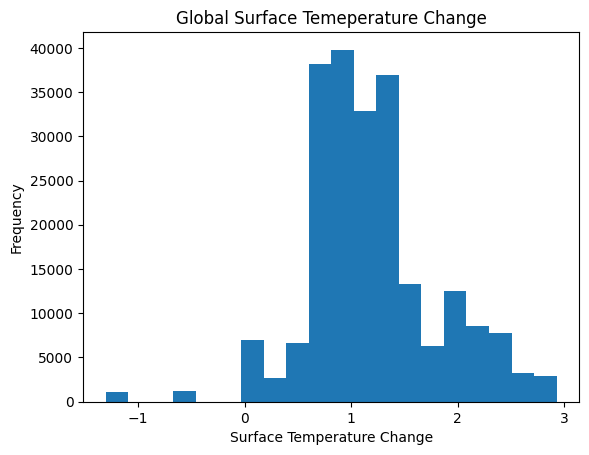

In [111]:
plt.hist(species['Surface Temperature Change'], bins = 20)
plt.xlabel('Surface Temperature Change')
plt.ylabel('Frequency')
plt.title('Global Surface Temeperature Change')
plt.show()

In [75]:
species.corr()

<ipython-input-75-aa6c901cbde2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  species.corr()


,total_area,small_range,Inhabited Area within Country,datanam_pct_area,Surface Temperature Change,"Climate related disasters frequency, Number of Disasters: Drought","Climate related disasters frequency, Number of Disasters: Extreme temperature","Climate related disasters frequency, Number of Disasters: Flood","Climate related disasters frequency, Number of Disasters: Landslide","Climate related disasters frequency, Number of Disasters: Storm","Climate related disasters frequency, Number of Disasters: Wildfire",GHG emissions
total_area,1.000000,-0.040307,0.168881,-0.248771,0.085052,-0.024501,0.004515,-0.108516,-0.064072,-0.021537,-0.000227,-0.028876
small_range,-0.040307,1.000000,-0.026298,0.181370,-0.007924,0.000132,0.019830,0.025635,0.024144,0.021229,0.010386,0.007176
Inhabited Area within Country,0.168881,-0.026298,1.000000,0.124750,-0.012827,0.129198,0.031979,0.205774,0.013944,0.023685,0.038750,0.149480
datanam_pct_area,-0.248771,0.181370,0.124750,1.000000,-0.109128,0.054272,0.075352,0.355876,0.129203,0.114444,0.026265,0.146083
Surface Temperature Change,0.085052,-0.007924,-0.012827,-0.109128,1.000000,0.090295,0.173039,-0.166188,-0.086687,0.024559,0.085618,0.123570
"Climate related disasters frequency, Number of Disasters: Drought",-0.024501,0.000132,0.129198,0.054272,0.090295,1.000000,0.026548,0.122467,0.060872,-0.027916,0.036334,0.278430
"Climate related disasters frequency, Number of Disasters: Extreme temperature",0.004515,0.019830,0.031979,0.075352,0.173039,0.026548,1.000000,-0.050401,0.068490,0.321387,0.248291,0.190600
"Climate related disasters frequency, Number of Disasters: Flood",-0.108516,0.025635,0.205774,0.355876,-0.166188,0.122467,-0.050401,1.000000,0.353674,0.032922,-0.130262,0.196447
"Climate related disasters frequency, Number of Disasters: Landslide",-0.064072,0.024144,0.013944,0.129203,-0.086687,0.060872,0.068490,0.353674,1.000000,0.137339,-0.085124,0.184779
"Climate related disasters frequency, Number of Disasters: Storm",-0.021537,0.021229,0.023685,0.114444,0.024559,-0.027916,0.321387,0.032922,0.137339,1.000000,-0.072094,0.135471


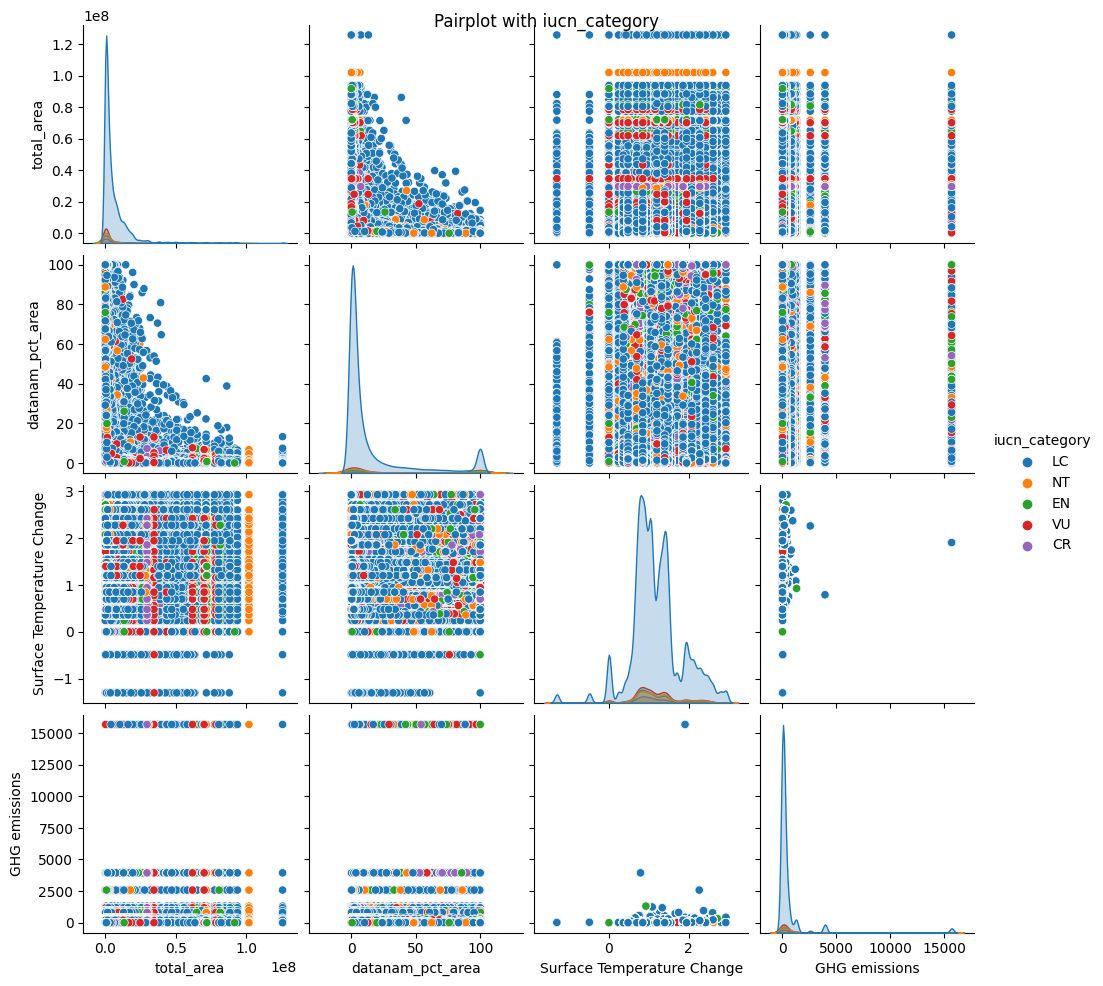

In [114]:
# Select columns for pairplot
columns_for_pairplot = ['iucn_category', 'total_area', 'datanam_pct_area', 'Surface Temperature Change', 'GHG emissions']

# Pairplot with iucn_category
sns.pairplot(species[columns_for_pairplot], hue='iucn_category')
plt.suptitle('Pairplot with iucn_category')
plt.show()

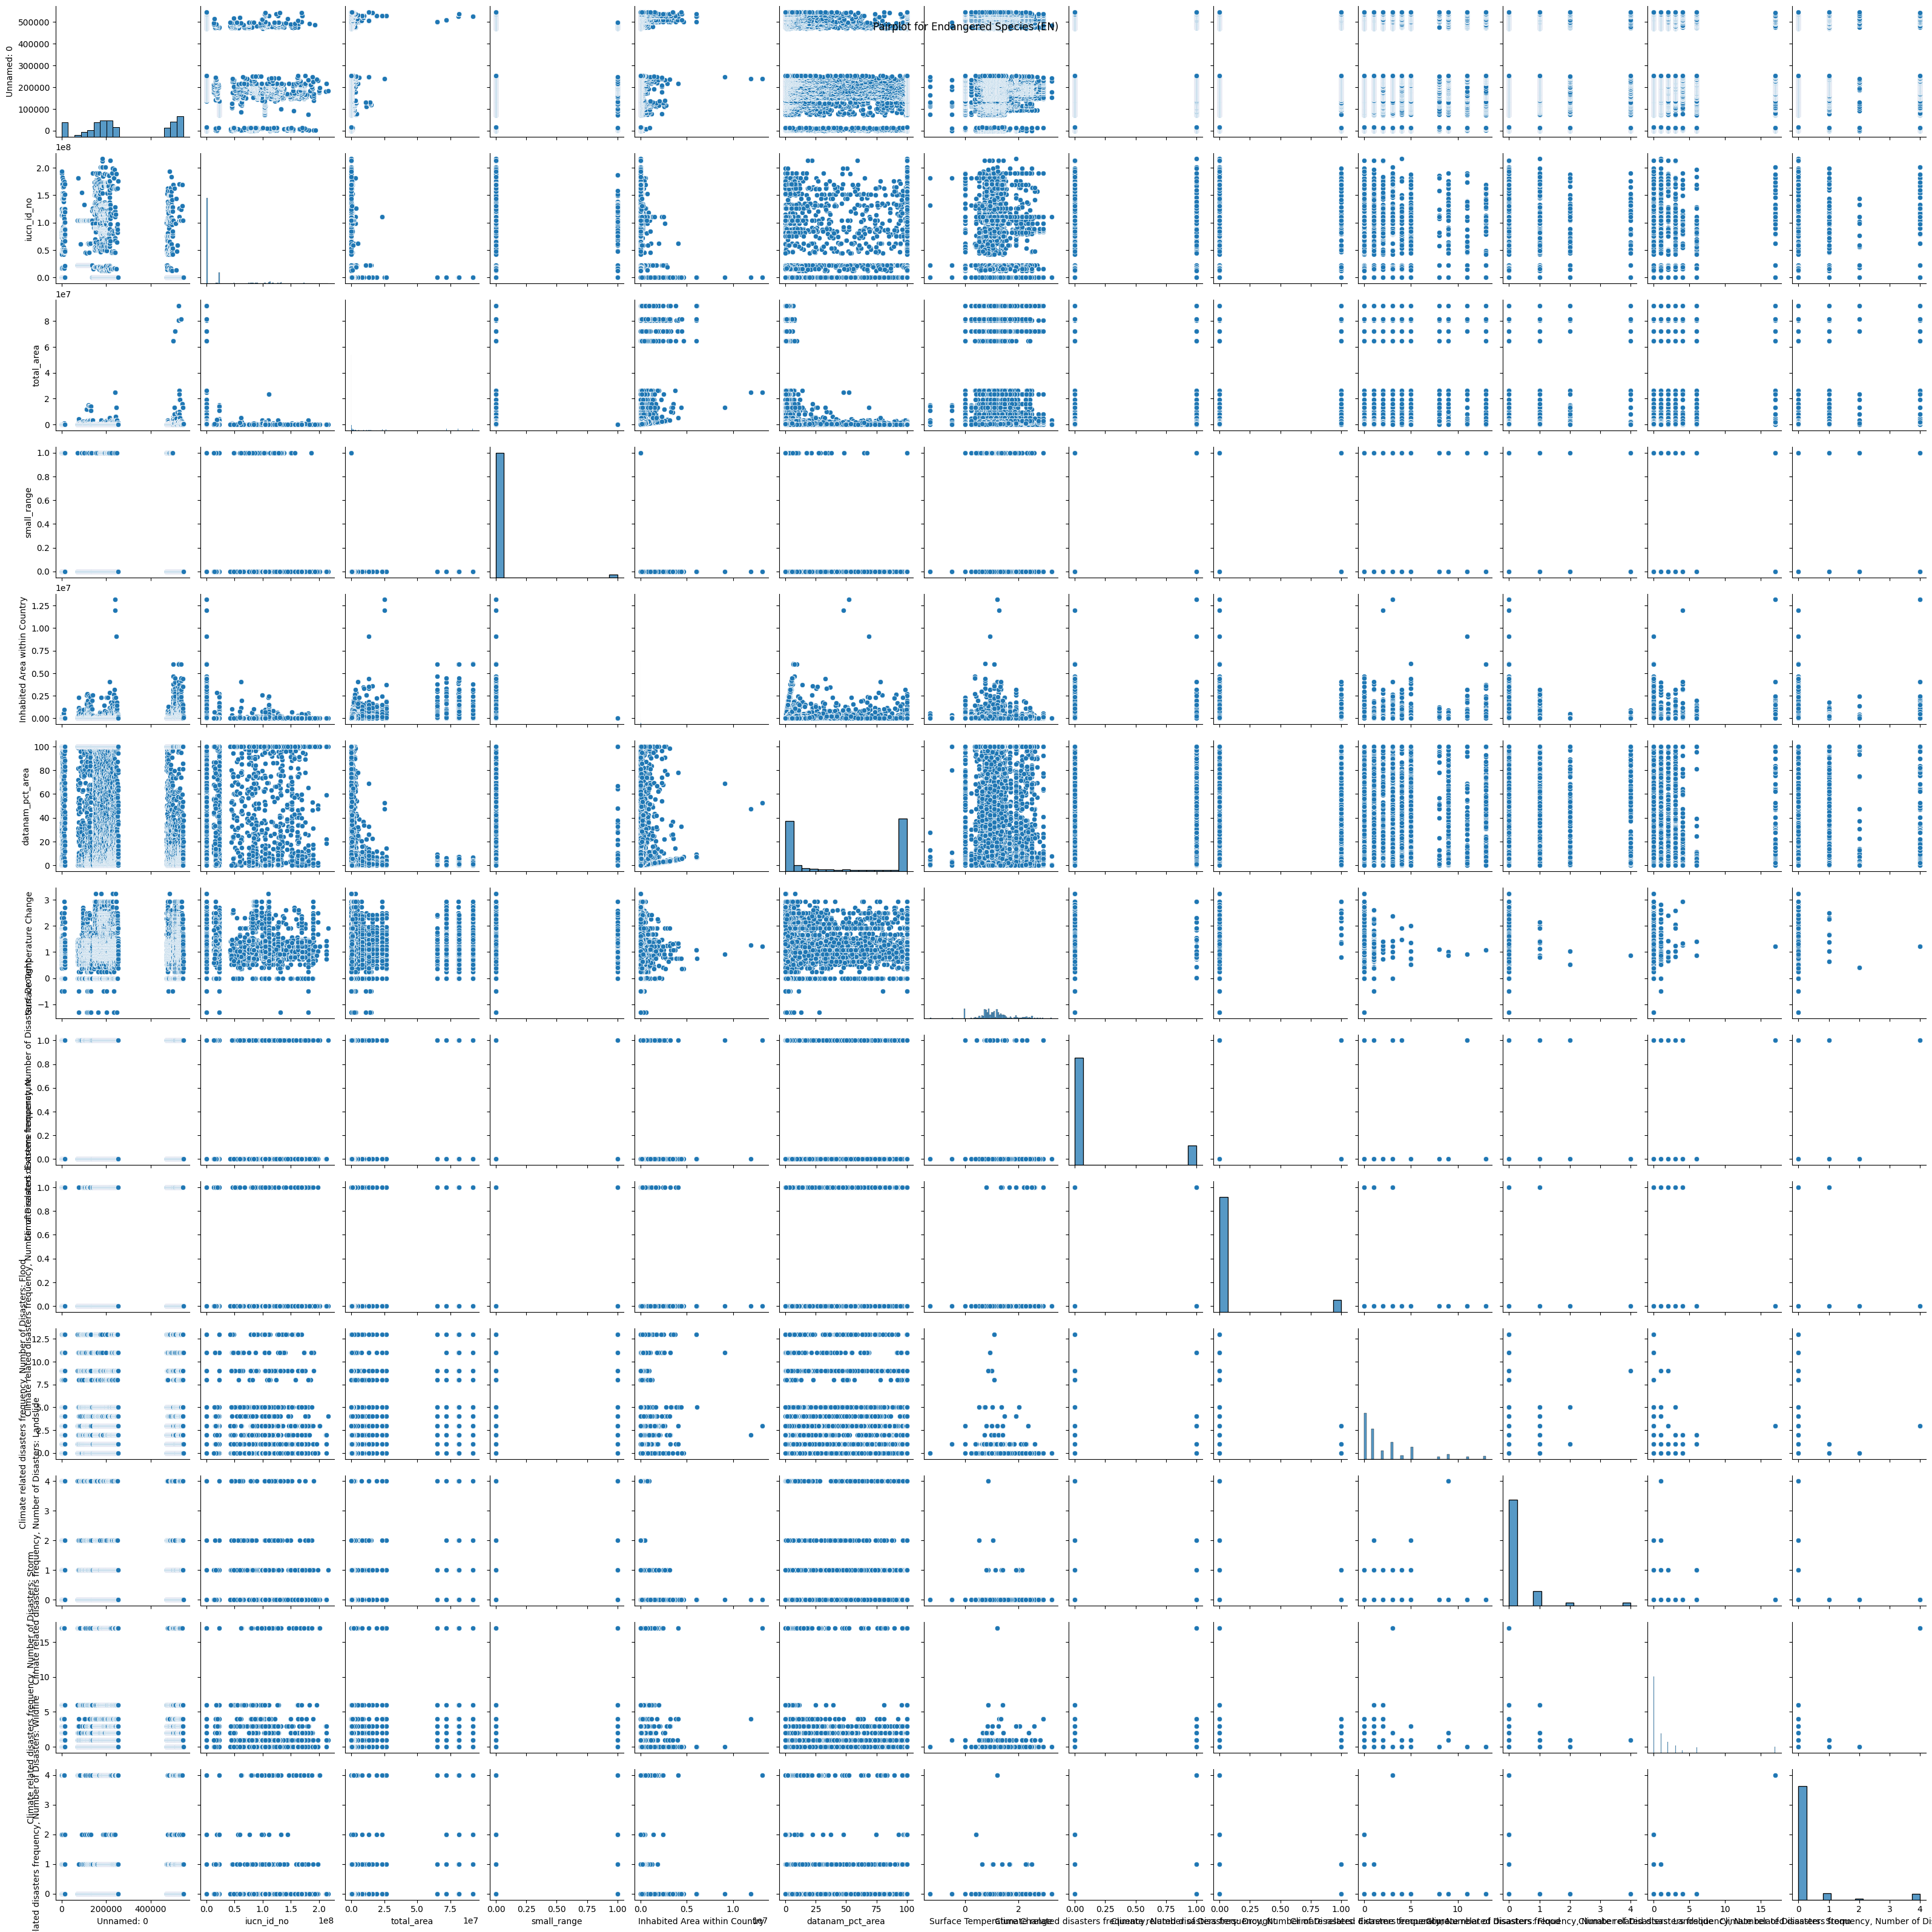

In [ ]:
# Filter the dataset for Endangered animals
en_data = species[species['iucn_category'] == 'EN']

# Pairplot for numerical features specifically for 'EN' category
sns.pairplot(en_data)
plt.suptitle('Pairplot for Endangered Species (EN)')
plt.show()